<a href="https://colab.research.google.com/github/AjayKumar1994/Stock-Price-Prediction-LSTM-FBProphet-ARIMA/blob/master/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("/content/drive/My Drive/Regression Model/kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

**Preprocessing**

In [5]:
##See the missing value and datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
# See the missing values
df.isnull().sum().sum()

0

In [7]:
#format the date
d =[]
for i in df['date'].values:
    d.append(i[:4])
    
df['date'] = d
# convert everything to same datatype
for i in df.columns:
    df[i]=df[i].astype(float)

In [8]:
#make a new column age of the house  
df['age'] = df['date'] - df['yr_built']

#calculate the total years of renovation
df['renov_age'] = np.abs(df['yr_renovated'] - df['yr_built'])
df['renov_age'] = df.renov_age.apply(lambda x: x if len(str(int(x)))==2 else 0.0)

In [9]:
#remove unwanted columns like yr_built, yr_renovated, date, id
df.drop(['id','date', 'yr_built', 'yr_renovated'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,59.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,98125.0,47.7210,-122.319,1690.0,7639.0,63.0,40.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,82.0,0.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,98136.0,47.5208,-122.393,1360.0,5000.0,49.0,0.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,28.0,0.0


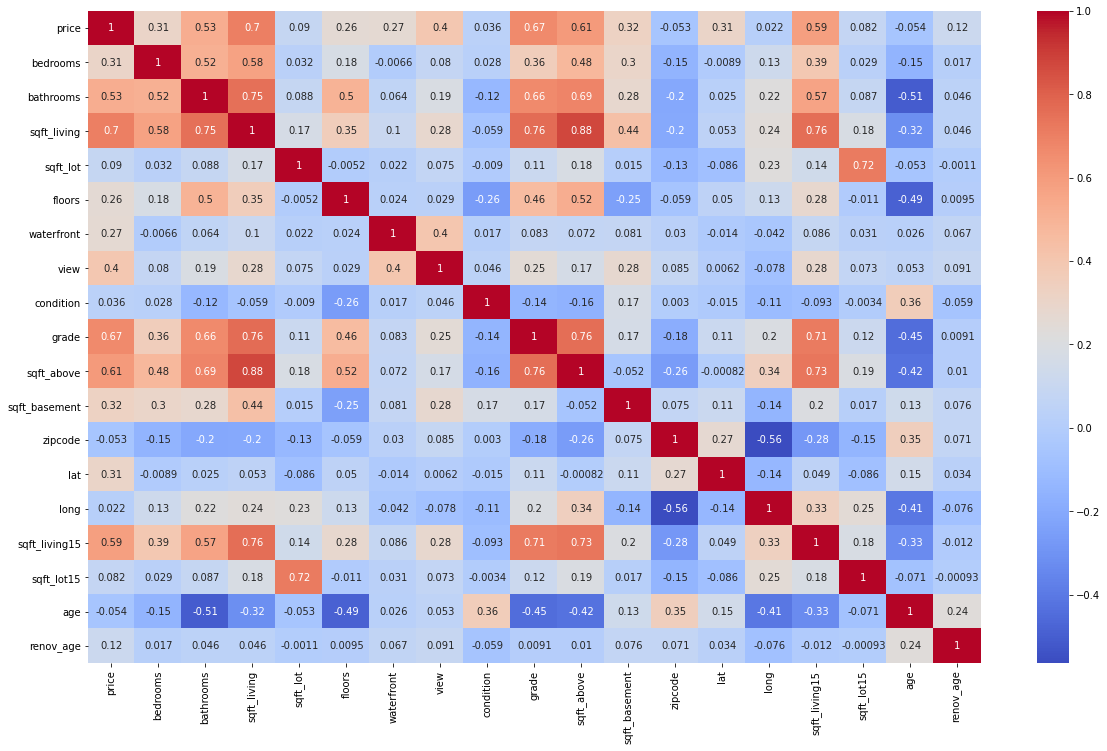

In [10]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [11]:
#print highly correlated variables
corr_features =[]

for i , r in df.corr().iterrows():
    k=0
    for j in range(len(r)):
        if i!= r.index[k]:
            if r.values[k] >=0.5:
                corr_features.append([i, r.index[k], r.values[k]])
        k += 1
corr_features

[['price', 'bathrooms', 0.5251375054139724],
 ['price', 'sqft_living', 0.7020350546118009],
 ['price', 'grade', 0.667434256020255],
 ['price', 'sqft_above', 0.6055672983560842],
 ['price', 'sqft_living15', 0.5853789035795697],
 ['bedrooms', 'bathrooms', 0.5158836376158442],
 ['bedrooms', 'sqft_living', 0.5766706925022366],
 ['bathrooms', 'price', 0.5251375054139724],
 ['bathrooms', 'bedrooms', 0.5158836376158442],
 ['bathrooms', 'sqft_living', 0.7546652789673779],
 ['bathrooms', 'floors', 0.5006531725878427],
 ['bathrooms', 'grade', 0.6649825338781631],
 ['bathrooms', 'sqft_above', 0.6853424758761738],
 ['bathrooms', 'sqft_living15', 0.5686342895782329],
 ['sqft_living', 'price', 0.7020350546118009],
 ['sqft_living', 'bedrooms', 0.5766706925022366],
 ['sqft_living', 'bathrooms', 0.7546652789673779],
 ['sqft_living', 'grade', 0.7627044764584873],
 ['sqft_living', 'sqft_above', 0.8765965986813212],
 ['sqft_living', 'sqft_living15', 0.7564202590172227],
 ['sqft_lot', 'sqft_lot15', 0.71855

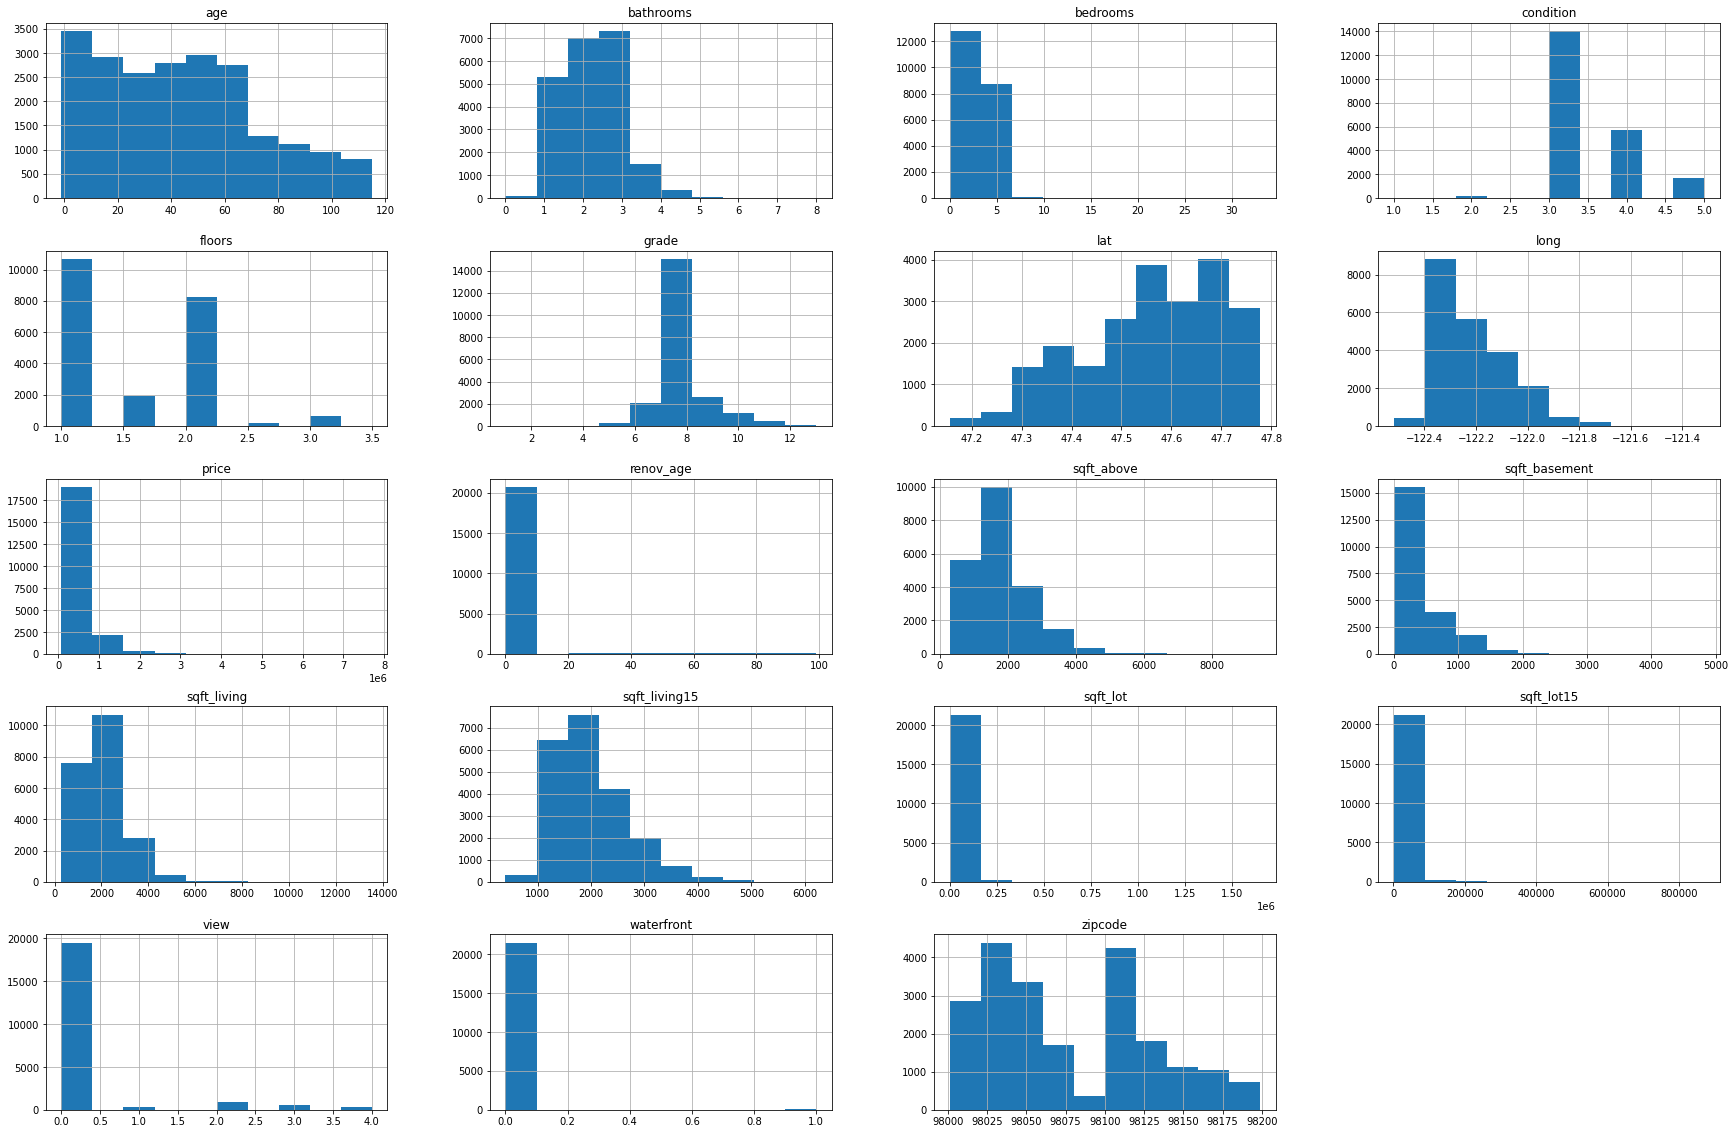

In [12]:
#plot the frequency of the columns
df.hist(figsize=(30,20))
plt.show()

In [13]:
#let us remove some features.
df.drop(['sqft_above'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,59.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,400.0,98125.0,47.7210,-122.319,1690.0,7639.0,63.0,40.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,82.0,0.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,910.0,98136.0,47.5208,-122.393,1360.0,5000.0,49.0,0.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,28.0,0.0


In [14]:
df.shape

(21613, 18)

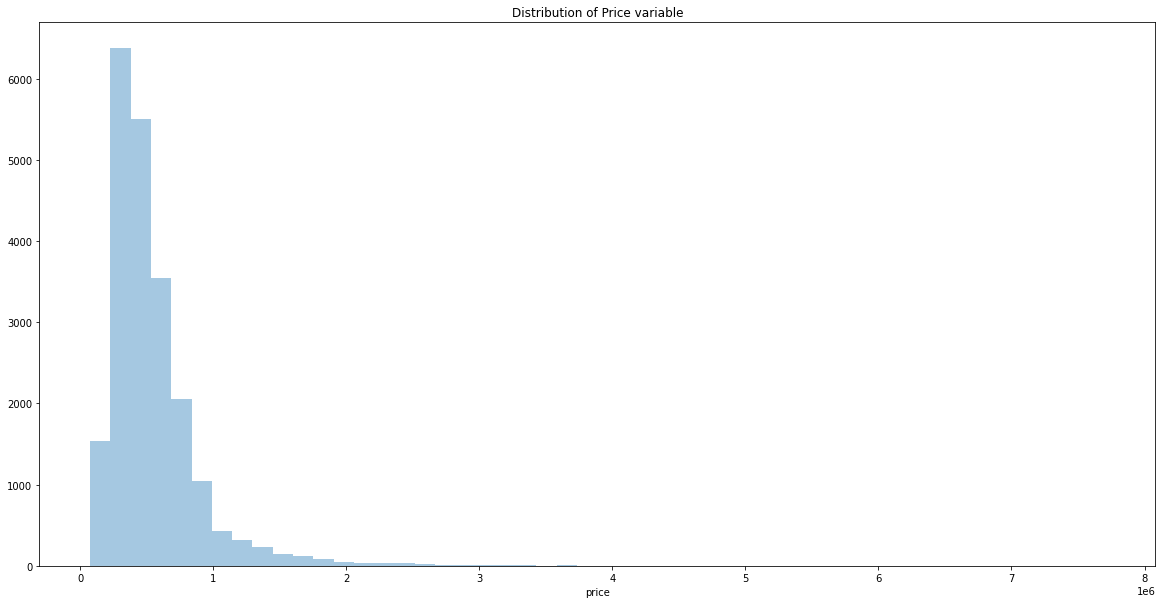

In [15]:
#plot the (dependent) variable to see its distribution
# plt.title()
plt.figure(figsize=(20,10))
sns.distplot(df.price, kde=False).set_title('Distribution of Price variable')
plt.show()

**Outlier Detection**

In [16]:
#let us numerically draw conclusions
#creating function that can calculate interquartile range of the data
def calc_interquartile(df, column):
    ##creating global variables for plotting the graph for better demonstration
    global lower, upper
    #calculating the first and third quartile
    first_quartile, third_quartile = np.percentile(df[column], 25), np.percentile(df[column], 75)
    #calculate the interquartilerange
    iqr = third_quartile - first_quartile
    # outlier cutoff (1.5 is a generally taken as a threshold thats why i am also taking it)
    cutoff = iqr*1.5
    #calculate the lower and upper limits
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #remove the outliers from the columns
    upper_outliers = df[df[column] > upper]
    lower_outliers = df[df[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])

Total outliers in  price
Lower outliers 0
Upper outliers 1146
total outliers 1146



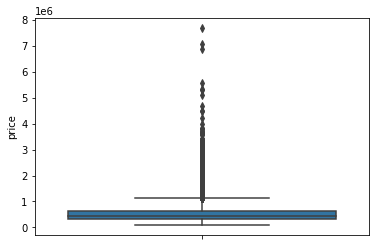

Total outliers in  bedrooms
Lower outliers 212
Upper outliers 334
total outliers 546



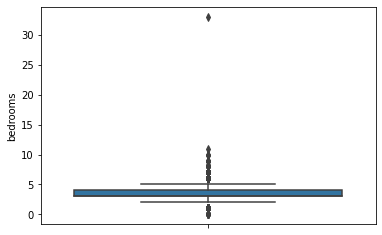

Total outliers in  bathrooms
Lower outliers 14
Upper outliers 557
total outliers 571



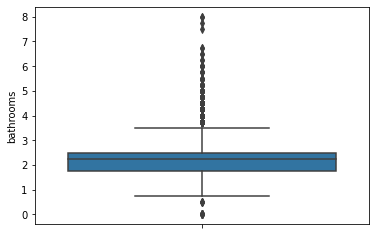

Total outliers in  sqft_living
Lower outliers 0
Upper outliers 572
total outliers 572



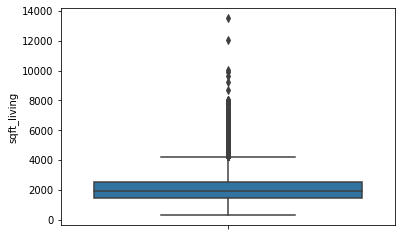

Total outliers in  sqft_lot
Lower outliers 0
Upper outliers 2425
total outliers 2425



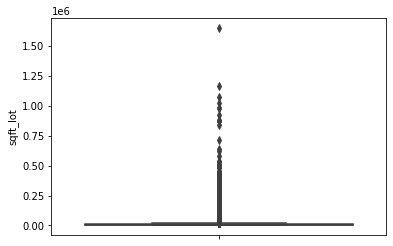

Total outliers in  floors
Lower outliers 0
Upper outliers 0
total outliers 0



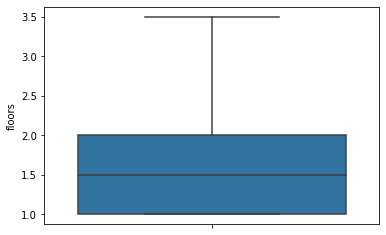

Total outliers in  waterfront
Lower outliers 0
Upper outliers 163
total outliers 163



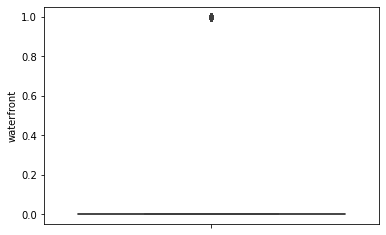

Total outliers in  view
Lower outliers 0
Upper outliers 2124
total outliers 2124



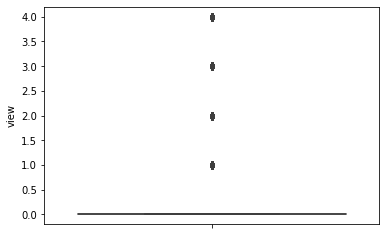

Total outliers in  condition
Lower outliers 30
Upper outliers 0
total outliers 30



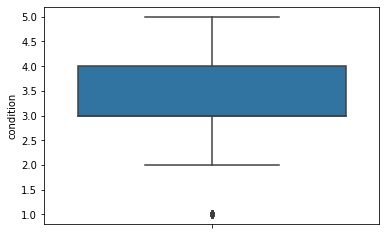

Total outliers in  grade
Lower outliers 275
Upper outliers 1636
total outliers 1911



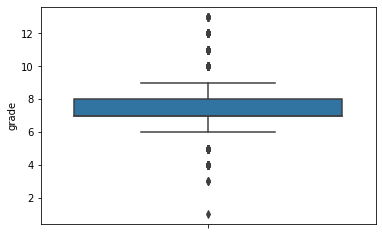

Total outliers in  sqft_basement
Lower outliers 0
Upper outliers 496
total outliers 496



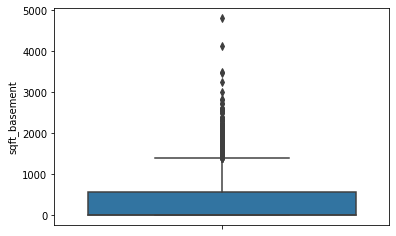

Total outliers in  zipcode
Lower outliers 0
Upper outliers 0
total outliers 0



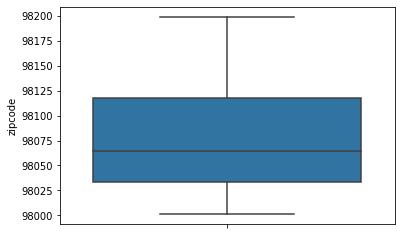

Total outliers in  lat
Lower outliers 2
Upper outliers 0
total outliers 2



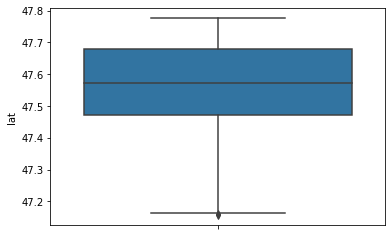

Total outliers in  long
Lower outliers 0
Upper outliers 256
total outliers 256



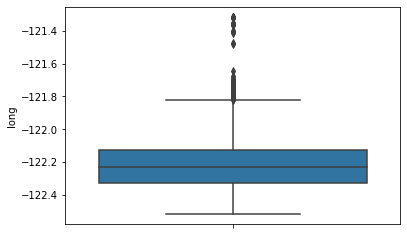

Total outliers in  sqft_living15
Lower outliers 0
Upper outliers 544
total outliers 544



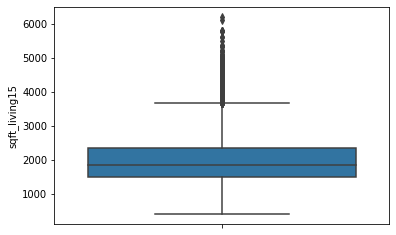

Total outliers in  sqft_lot15
Lower outliers 0
Upper outliers 2194
total outliers 2194



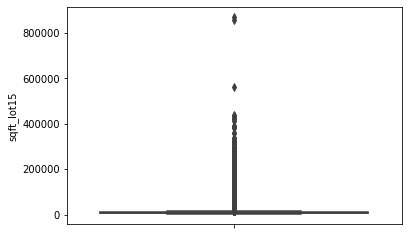

Total outliers in  age
Lower outliers 0
Upper outliers 0
total outliers 0



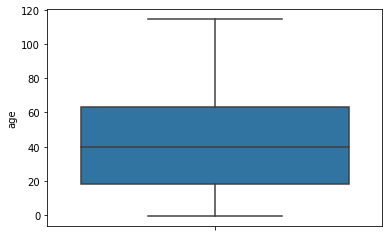

Total outliers in  renov_age
Lower outliers 0
Upper outliers 868
total outliers 868



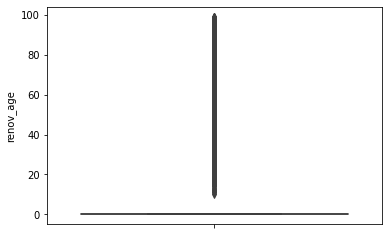

In [17]:
#applying the above function on columns to find the total outliers in every feature
for i in df.columns:
    print('Total outliers in ', i)
    calc_interquartile(df, i)
    print()
    # creating boxplots to see the outliers in the each variables
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[i]).set_title
    plt.show()

Lower outliers 0
Upper outliers 1146
total outliers 1146
1129575.0 -162625.0


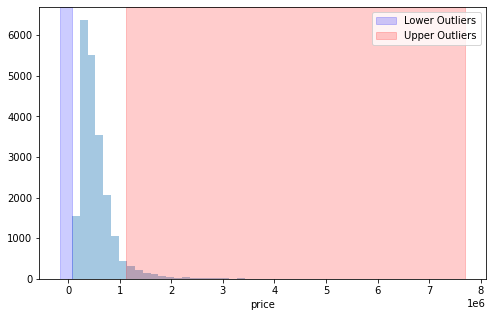

Lower outliers 212
Upper outliers 334
total outliers 546
5.5 1.5


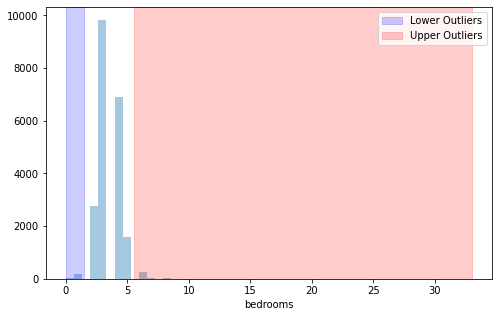

Lower outliers 14
Upper outliers 557
total outliers 571
3.625 0.625


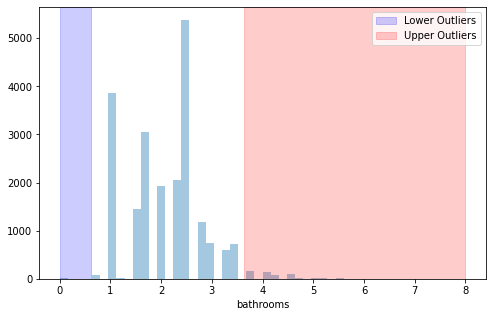

Lower outliers 0
Upper outliers 572
total outliers 572
4234.5 -257.5


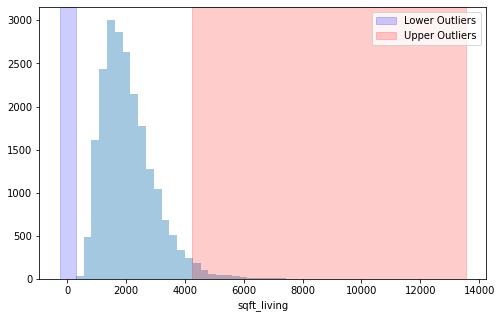

Lower outliers 0
Upper outliers 2425
total outliers 2425
19160.0 -3432.0


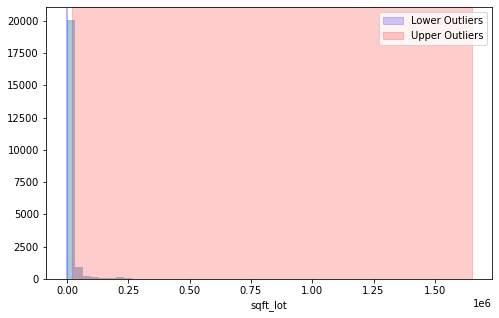

Lower outliers 0
Upper outliers 0
total outliers 0
3.5 -0.5


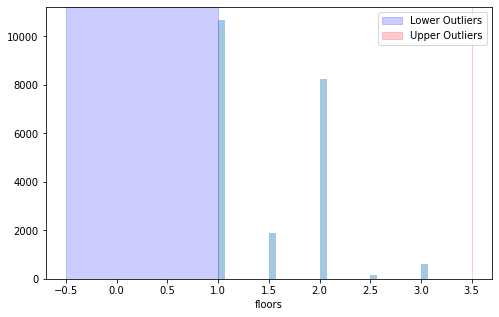

Lower outliers 0
Upper outliers 163
total outliers 163
0.0 0.0


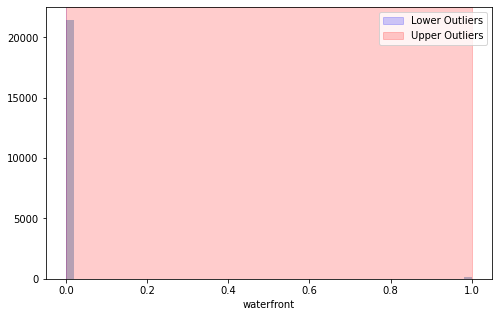

Lower outliers 0
Upper outliers 2124
total outliers 2124
0.0 0.0


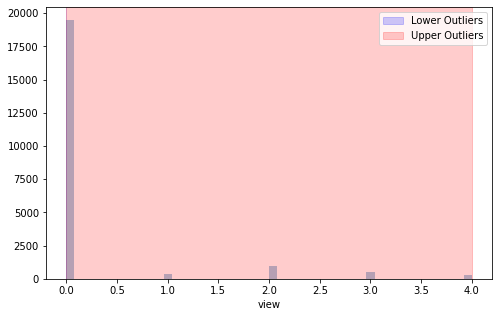

Lower outliers 30
Upper outliers 0
total outliers 30
5.5 1.5


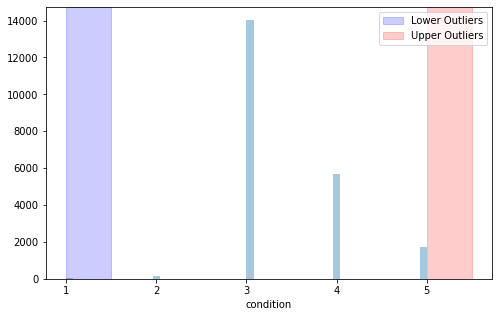

Lower outliers 275
Upper outliers 1636
total outliers 1911
9.5 5.5


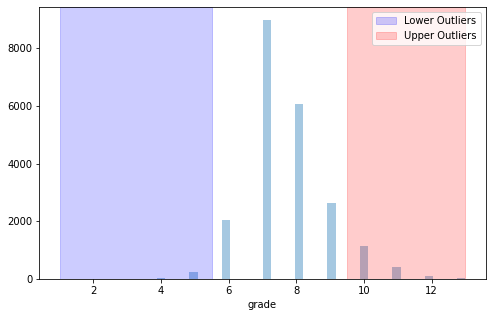

Lower outliers 0
Upper outliers 496
total outliers 496
1400.0 -840.0


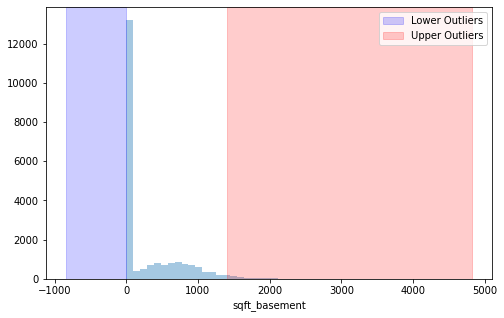

Lower outliers 0
Upper outliers 0
total outliers 0
98245.5 97905.5


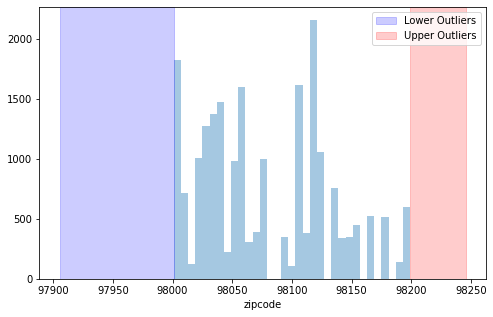

Lower outliers 2
Upper outliers 0
total outliers 2
47.9885 47.1605


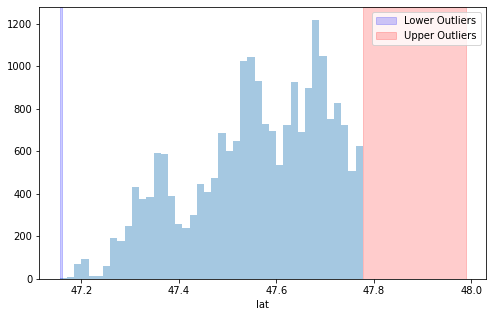

Lower outliers 0
Upper outliers 256
total outliers 256
-121.82050000000001 -122.63249999999996


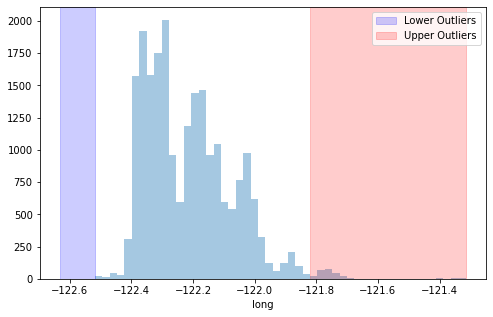

Lower outliers 0
Upper outliers 544
total outliers 544
3665.0 185.0


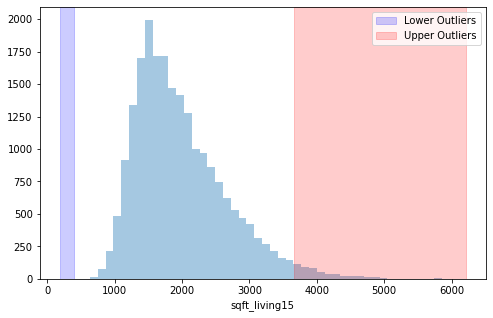

Lower outliers 0
Upper outliers 2194
total outliers 2194
17557.5 -2374.5


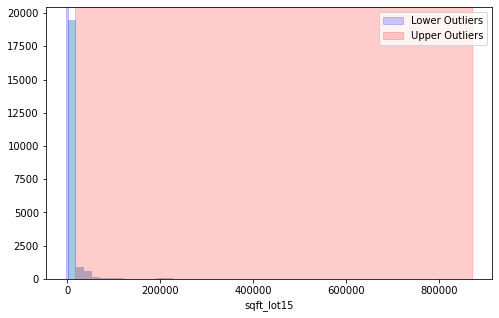

Lower outliers 0
Upper outliers 0
total outliers 0
130.5 -49.5


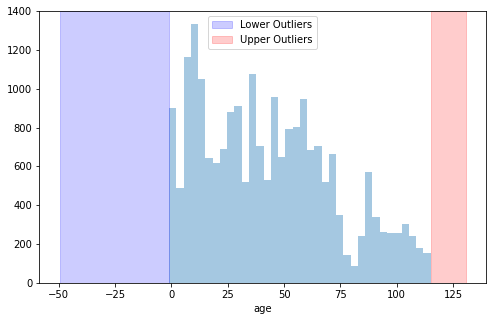

Lower outliers 0
Upper outliers 868
total outliers 868
0.0 0.0


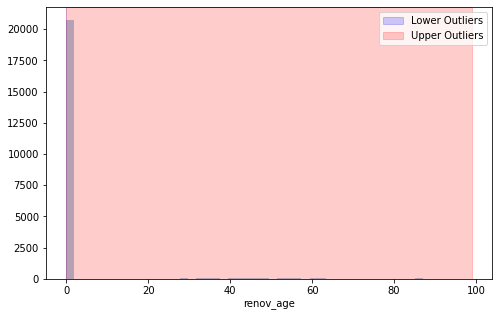

In [18]:
#plotting outliers graph for each feature 
for i in df.columns:
  calc_interquartile(df, i)
  plt.figure(figsize = (8,5))
  sns.distplot(df[i], kde=False)
  print(upper, lower)
  plt.axvspan(xmin = lower,xmax= df[i].min(),alpha=0.2, color='blue', label='Lower Outliers')
  plt.axvspan(xmin = upper,xmax= df[i].max(),alpha=0.2, color='red', label='Upper Outliers')
  plt.legend()
  plt.show()

In [19]:
""" creating function for calculating zscore which is subtracting the mean from every data point and dividing by the standard deviation and if the zscore value of any data point 
is less than -3 or greater than 3, then that data point is an outlier"""

def z_score(df, column):
    #creating global variables for plotting the graph for better demonstration
    global zscore, outlier
    #creating lists to store zscore and outliers 
    zscore = []
    outlier =[]
    # for zscore generally taken thresholds are 2.5, 3 or 3.5 hence i took 3
    threshold = 3
    # calculating the mean of the passed column
    mean = np.mean(df[column])
    # calculating the standard deviation of the passed column
    std = np.std(df[column])
    for i in df[column]:
        z = (i-mean)/std
        zscore.append(z)
        #if the zscore is greater than threshold = 3 that means it is an outlier
        if np.abs(z) > threshold:
            outlier.append(i)
    return print('total outliers by Z_score :', len(outlier))

total outliers by Z_score : 406
0.0 0.0


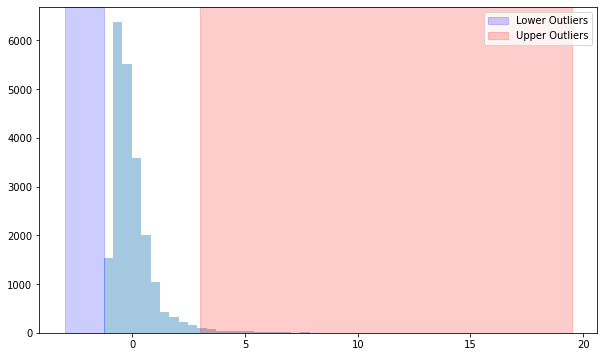

In [20]:
#plotting outliers graph for 'price' feature 
z_score(df, 'price')
plt.figure(figsize = (10,6))
sns.distplot(zscore, kde=False)
print(upper, lower)
plt.axvspan(xmin = -3 ,xmax= min(zscore),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()

In [21]:
#let us numerically draw conclusions
#creating function that can calculate interquartile range of the data
def calc_interquartile(df, column):
    ##creating global variables for plotting the graph for better demonstration
    global lower, upper
    #calculating the first and third quartile
    first_quartile, third_quartile = np.percentile(df[column], 25), np.percentile(df[column], 75)
    #calculate the interquartilerange
    iqr = third_quartile - first_quartile
    # outlier cutoff (1.5 is a generally taken as a threshold thats why i am also taking it)
    cutoff = iqr*1.5
    #calculate the lower and upper limits
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #remove the outliers from the columns
    upper_outliers = df[df[column] > upper]
    lower_outliers = df[df[column] < lower]
    return print('total outliers by BOX Plot :', upper_outliers.shape[0] + lower_outliers.shape[0])

In [22]:
for i in df.columns:
    print('Total outliers in :', i)
    calc_interquartile(df, i)
    z_score(df, i)
    print()

Total outliers in : price
total outliers by BOX Plot : 1146
total outliers by Z_score : 406

Total outliers in : bedrooms
total outliers by BOX Plot : 546
total outliers by Z_score : 75

Total outliers in : bathrooms
total outliers by BOX Plot : 571
total outliers by Z_score : 187

Total outliers in : sqft_living
total outliers by BOX Plot : 572
total outliers by Z_score : 248

Total outliers in : sqft_lot
total outliers by BOX Plot : 2425
total outliers by Z_score : 347

Total outliers in : floors
total outliers by BOX Plot : 0
total outliers by Z_score : 8

Total outliers in : waterfront
total outliers by BOX Plot : 163
total outliers by Z_score : 163

Total outliers in : view
total outliers by BOX Plot : 2124
total outliers by Z_score : 829

Total outliers in : condition
total outliers by BOX Plot : 30
total outliers by Z_score : 30

Total outliers in : grade
total outliers by BOX Plot : 1911
total outliers by Z_score : 136

Total outliers in : sqft_basement
total outliers by BOX Pl

In [23]:
#remove the outliers from price using zscore
z_score(df, 'price')
dj=[]
for i in df.price:
    if i in set(outlier):
        dj.append(0.0)
    else:
        dj.append(i)
        
df['P'] = dj

x = df.drop(df[df['P'] == 0.0].index) 
x.shape

total outliers by Z_score : 406


(21207, 19)

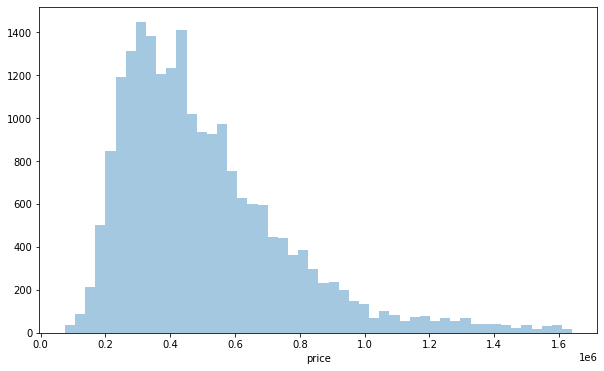

In [24]:
plt.figure(figsize = (10,6))
sns.distplot(x['price'], kde=False)
plt.show()

In [25]:
#defining the independent and dependent variable
X = x.drop(['price','P'], axis=1)
Y = x['price']

In [26]:
#removing the outliers using interquartile method
calc_interquartile(df, 'price')
upper_outliers = df[df['price'] > upper]
upper_outliers

total outliers by BOX Plot : 1146


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age,P
5,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3.0,11.0,1530.0,98053.0,47.6561,-122.005,4760.0,101930.0,13.0,0.0,1225000.0
21,2000000.0,3.0,2.75,3050.0,44867.0,1.0,0.0,4.0,3.0,9.0,720.0,98040.0,47.5316,-122.233,4110.0,20336.0,46.0,0.0,0.0
49,1350000.0,3.0,2.50,2753.0,65005.0,1.0,1.0,2.0,5.0,9.0,588.0,98070.0,47.4041,-122.451,2680.0,72513.0,62.0,0.0,1350000.0
69,1325000.0,5.0,2.25,3200.0,20158.0,1.0,0.0,0.0,3.0,8.0,1600.0,98004.0,47.6303,-122.215,3390.0,20158.0,49.0,0.0,1325000.0
125,1450000.0,4.0,2.75,2750.0,17789.0,1.5,0.0,0.0,3.0,8.0,770.0,98004.0,47.6141,-122.212,3060.0,11275.0,101.0,78.0,1450000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,1700000.0,4.0,3.50,3830.0,8963.0,2.0,0.0,0.0,3.0,10.0,710.0,98004.0,47.5990,-122.197,2190.0,10777.0,1.0,0.0,0.0
21576,3567000.0,5.0,4.50,4850.0,10584.0,2.0,1.0,4.0,3.0,10.0,1310.0,98008.0,47.5943,-122.110,3470.0,18270.0,8.0,0.0,0.0
21590,1222500.0,4.0,3.50,4910.0,9444.0,1.5,0.0,0.0,3.0,11.0,1800.0,98074.0,47.6502,-122.066,4560.0,11063.0,7.0,0.0,1222500.0
21597,1575000.0,4.0,3.25,3410.0,10125.0,2.0,0.0,0.0,3.0,10.0,0.0,98040.0,47.5653,-122.223,2290.0,10125.0,8.0,0.0,1575000.0


In [27]:
x_interqu = df.drop(df[df['price']>upper].index)
x_interqu

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age,P
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,59.0,0.0,221900.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,400.0,98125.0,47.7210,-122.319,1690.0,7639.0,63.0,40.0,538000.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,82.0,0.0,180000.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,910.0,98136.0,47.5208,-122.393,1360.0,5000.0,49.0,0.0,604000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,28.0,0.0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3.0,8.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0,5.0,0.0,360000.0
21609,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3.0,8.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0,1.0,0.0,400000.0
21610,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3.0,7.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0,5.0,0.0,402101.0
21611,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,3.0,8.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0,11.0,0.0,400000.0


In [28]:
y_interqu = x_interqu['price']
x_interqu = x_interqu.drop(['price','P'], axis=1)
y_interqu

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 20467, dtype: float64

In [29]:
#isolation forest
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
outlier = iso.fit_predict(df)

In [30]:
#mask variable contains all the outliers
mask = outlier == -1
#task variable contains all the non-outliers data
task = outlier != -1
#creating dataframe containing outliers
df_1 = df[mask]
#creating dataframe containing non-outliers
df_2 = df[task]

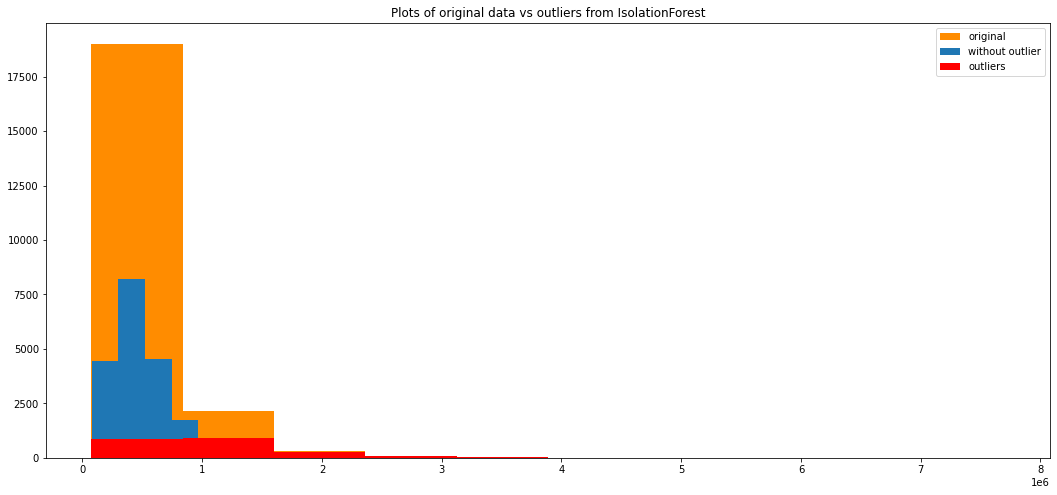

In [31]:
#plotting graph to show the original data, outliers and non-outliers 
plt.figure(figsize=(18, 8))
plt.title('Plots of original data vs outliers from IsolationForest')
plt.hist(df['price'], label= 'original', color='darkorange')
plt.hist(df_2['price'], label='without outlier')
plt.hist(df_1['price'], label='outliers', color='red')
plt.legend()
plt.show()

In [32]:
y2 = df_2['price']
df_2.drop(['price','P'], axis=1, inplace=True)

**libraries for models**

In [33]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, BayesianRidge,RANSACRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

**training the data**

In [34]:
#z_score one 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
r2_score(y_test, pred)

0.7084573254104397

In [35]:
#interquartile one 
x_train, x_test, y_train, y_test = train_test_split(x_interqu, y_interqu, test_size = 0.3, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
r2_score(y_test, pred)

0.688225534733149

In [36]:
#isolationforest 
x_train, x_test, y_train, y_test = train_test_split(df_2, y2, test_size = 0.3, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
r2_score(y_test, pred)

0.6599236139882214

**So its clear that we should go with z_score one**

In [37]:
#Hyperparameter tuning
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)
kfold = KFold(n_splits=5)
results = cross_val_score(lr, x_train, y_train, cv=kfold)
results.mean()

0.7130022317424838

**Creating Pipeline to pass each models in it**

In [38]:
sc = ('Scaler', StandardScaler())
est =[]
est.append(('LinearRegression', Pipeline([sc, ('LinearRegression', LinearRegression())])))
est.append(('Ridge', Pipeline([sc, ('Ridge', Ridge())])))
est.append(('Lasso', Pipeline([sc, ('Lasso', Lasso())])))
est.append(('BayesianRidge', Pipeline([sc, ('BayesianRidge', BayesianRidge())])))
est.append(('ElasticNet', Pipeline([sc,('Elastic', ElasticNet())])))
est.append(('SGD', Pipeline([sc,('SGD', SGDRegressor())])))
est.append(('Huber', Pipeline([sc,('Huber', HuberRegressor())])))
est.append(('RANSAC', Pipeline([sc,('RANSAC', RANSACRegressor())])))
est.append(('GradientBoosting', Pipeline([sc,('GradientBoosting',GradientBoostingRegressor())])))
est.append(('AdaBoost', Pipeline([sc, ('AdaBoost', AdaBoostRegressor())])))
est.append(('ExtraTree', Pipeline([sc,('ExtraTrees', ExtraTreesRegressor())])))
est.append(('RandomForest', Pipeline([sc,('RandomForest', RandomForestRegressor())]))) 
est.append(('Bagging', Pipeline([sc,('Bagging', BaggingRegressor())])))
est.append(('KNeighbors', Pipeline([sc,('KNeighbors', KNeighborsRegressor())])))
est.append(('DecisionTree', Pipeline([sc,('DecisionTree', DecisionTreeRegressor())])))
est.append(('XGB', Pipeline([sc,('XGB', XGBRegressor())])))

In [39]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
score = 'r2'
models_score =[]
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed)
    results = cross_val_score(i[1], x_train, y_train, cv=kfold, scoring=score)
    models_score.append({i[0] : '{} +/- {}'.format(results.mean(), results.std())})

[04:34:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:34:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [40]:
models_score

[{'LinearRegression': '0.7129208584223401 +/- 0.0066933705324224956'},
 {'Ridge': '0.7129211605737353 +/- 0.0066923198749017565'},
 {'Lasso': '0.7129210258362624 +/- 0.006692826005078254'},
 {'BayesianRidge': '0.7129235996794047 +/- 0.006681837085426481'},
 {'ElasticNet': '0.6731005584909029 +/- 0.007281830395727082'},
 {'SGD': '0.7127608242855965 +/- 0.006646116746989884'},
 {'Huber': '0.705981166842359 +/- 0.003808523310723989'},
 {'RANSAC': '-0.7549684325281325 +/- 3.1440213632273455'},
 {'GradientBoosting': '0.8551251067432888 +/- 0.005177007324647012'},
 {'AdaBoost': '0.5917396529268696 +/- 0.018113356463980122'},
 {'ExtraTree': '0.8690970406915394 +/- 0.007728216816035059'},
 {'RandomForest': '0.8693773870296272 +/- 0.007465992335034553'},
 {'Bagging': '0.8551818272171279 +/- 0.00908870075939916'},
 {'KNeighbors': '0.7826627999072627 +/- 0.011771466715093276'},
 {'DecisionTree': '0.7437766733706596 +/- 0.015280900545497855'},
 {'XGB': '0.8547124301152355 +/- 0.005315679960524793'

ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor and XBGRegressor are best

**Hyperparameter Tuning**

In [41]:
#Tuning only XGB as it has the higher accuracy
est =[]
est.append(('XGB', Pipeline([sc,('XGB', XGBRegressor())])))

best = []

parameters = {
              
              'XGB': {'XGB__learning_rate': [0.1,0.2,0.3,0.4],
                         
                         'XGB__max_depth': [4,6,8],
                      'XGB__n_estimators': [100,500,1000,1500]}
             }

for i in est:
    kfold = KFold(n_splits=5, random_state=seed)
    grid = GridSearchCV(estimator=i[1], param_grid = parameters[i[0]], cv = kfold, n_jobs=-1)
    grid.fit(x_train, y_train)
    best.append((i[0], grid.best_score_,  grid.best_params_))

[05:18:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [42]:
#implementing it with best parameters
xgb = XGBRegressor(learning_rate=0.1, max_depth=4, n_estimators=1000)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
xgb.score(x_test,y_test)

[05:18:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8875895756552115

In [43]:
best

[('XGB',
  0.8893140187857546,
  {'XGB__learning_rate': 0.1, 'XGB__max_depth': 4, 'XGB__n_estimators': 1000})]

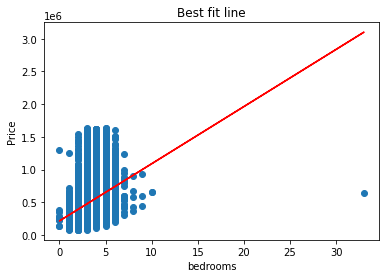

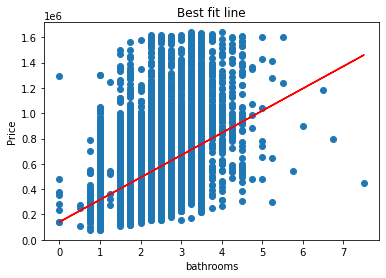

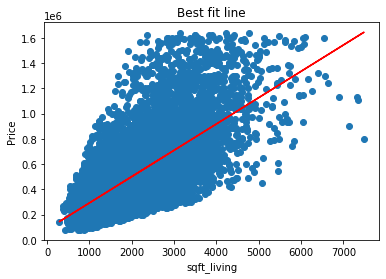

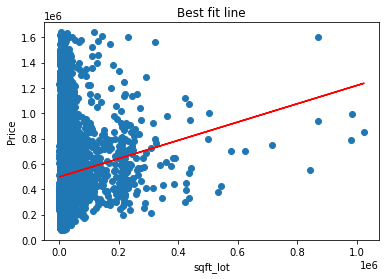

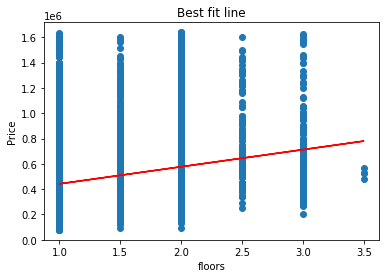

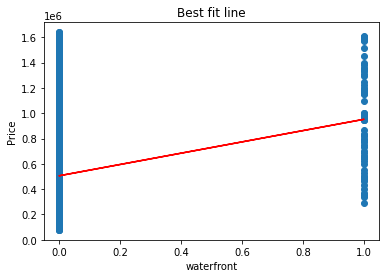

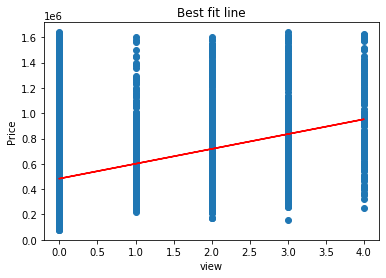

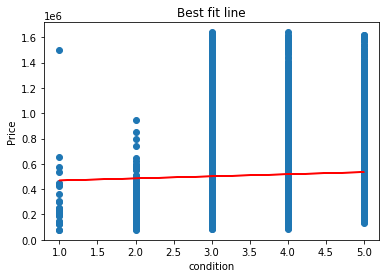

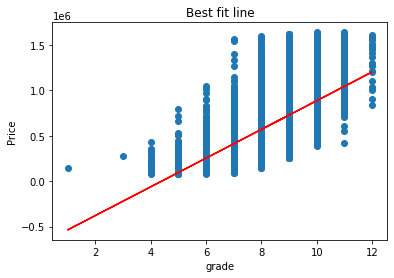

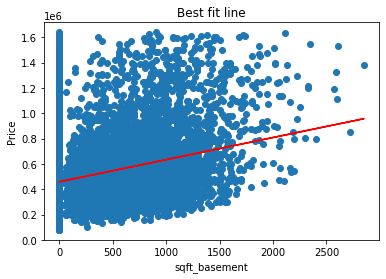

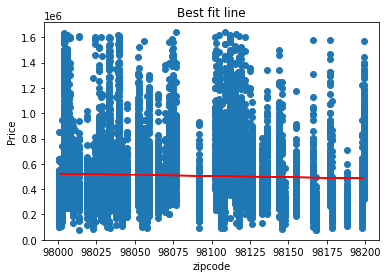

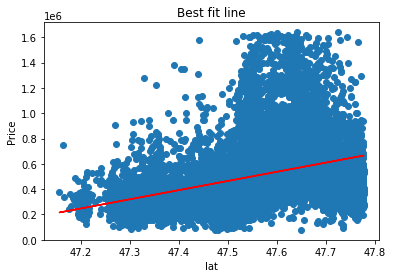

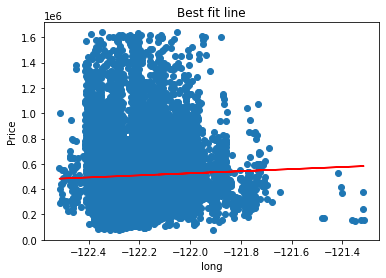

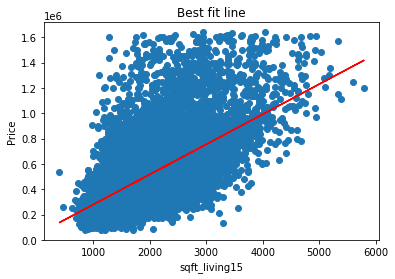

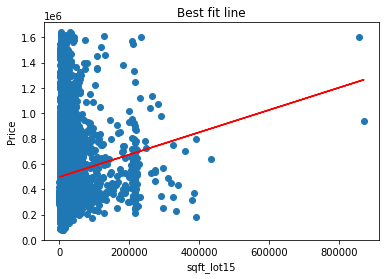

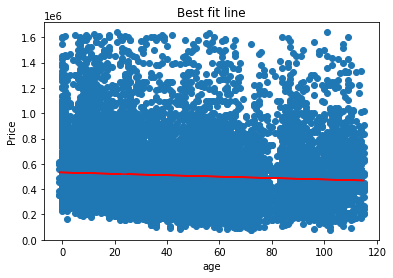

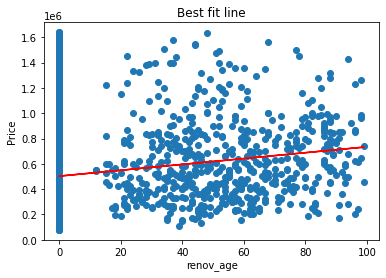

In [44]:
#plotting the regression line
for i,e in enumerate(x_train.columns):
    lr.fit(x_train[e].values[:,np.newaxis], y_train.values)
    plt.title("Best fit line")
    plt.xlabel(str(e))
    plt.ylabel('Price')
    plt.scatter(x_train[e].values[:,np.newaxis], y_train)
    plt.plot(x_train[e].values[:,np.newaxis], lr.predict(x_train[e].values[:,np.newaxis]),color='r')
    plt.show()